<a href="https://colab.research.google.com/github/mehraanjali/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import decision_regions
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [ ]:
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


<AxesSubplot:>

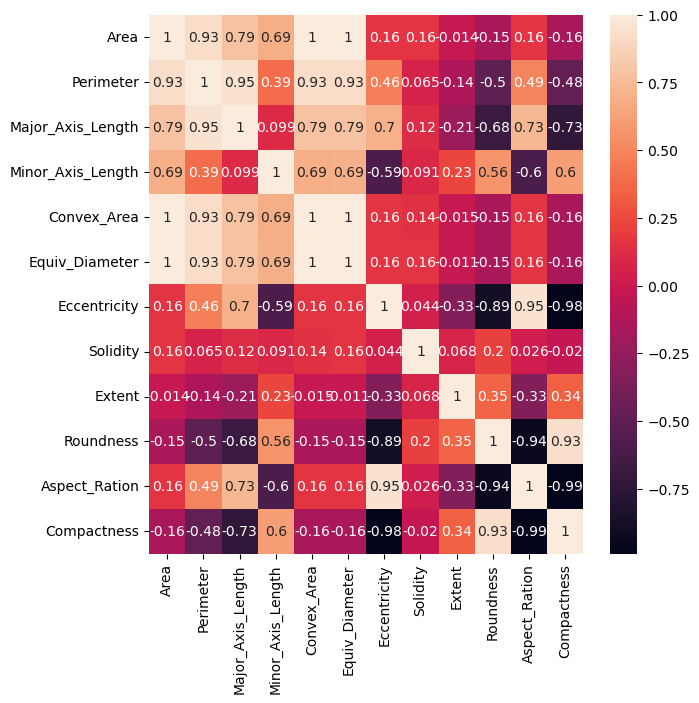

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr() , annot=True)

In [ ]:
data = data.drop(["Perimeter"] ,axis=1)

In [ ]:
data

,Area,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [ ]:
X = data.drop("Class",axis=1)
y = data["Class"]
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
std = StandardScaler()
std.fit(X_train,y_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [ ]:
##linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
#svm.LinearSVC()
rbf = svm.SVC(kernel='rbf',gamma =1,C=1)
rbf.fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
poly.fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
sig.fit(X_train, y_train)

SVC(C=1, decision_function_shape='ovo', kernel='sigmoid')

# RBF - Radial bais function



In [ ]:
rb = rbf.predict(X_test)

In [ ]:
print(classification_report(y_test,rb))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       431
           1       0.86      0.86      0.86       394

    accuracy                           0.87       825
   macro avg       0.87      0.87      0.87       825
weighted avg       0.87      0.87      0.87       825



<AxesSubplot:>

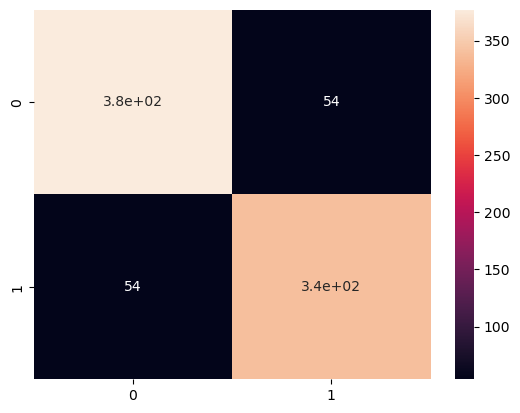

In [ ]:
sns.heatmap(confusion_matrix(y_test , rb ),annot=True)

# POLY

In [ ]:
po = poly.predict(X_test)
print(classification_report(y_test,po))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       431
           1       0.93      0.71      0.81       394

    accuracy                           0.84       825
   macro avg       0.86      0.83      0.83       825
weighted avg       0.85      0.84      0.83       825



<AxesSubplot:>

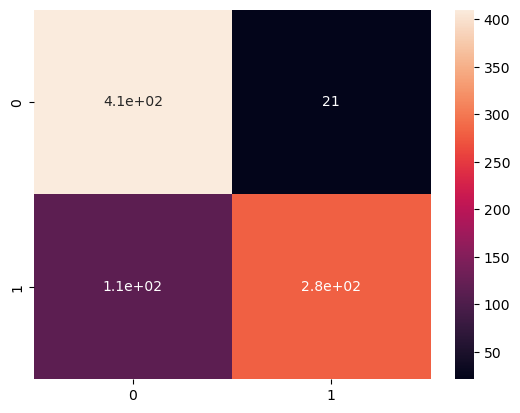

In [ ]:
sns.heatmap(confusion_matrix(y_test , po),annot=True)

# Sigmoid

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       431
           1       0.76      0.78      0.77       394

    accuracy                           0.78       825
   macro avg       0.78      0.78      0.78       825
weighted avg       0.78      0.78      0.78       825



<AxesSubplot:>

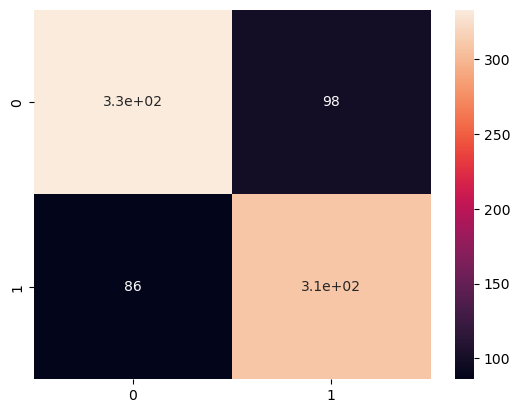

In [ ]:
si = sig.predict(X_test)
print(classification_report(y_test,si))
sns.heatmap(confusion_matrix(y_test , si),annot=True)

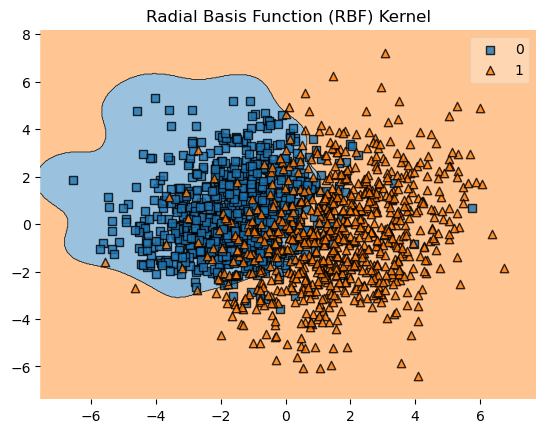

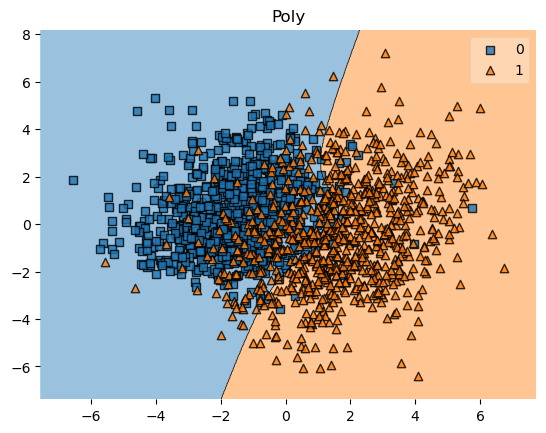

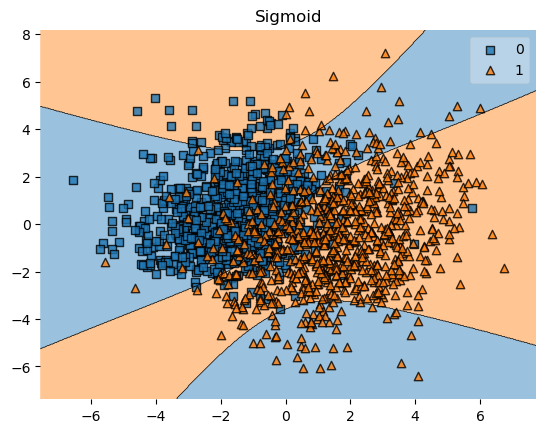

In [ ]:
from sklearn.decomposition import PCA
pc = PCA(2).fit(X_train,y)
X_train = pc.transform(X_train)
for i,j in zip([rbf ,poly,sig ],["Radial Basis Function (RBF) Kernel" ,"Poly","Sigmoid" ]):
    i.fit(X_train,y_train)
    decision_regions.plot_decision_regions(X_train,y_train,i)
    plt.title(j)
    plt.show()